In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

## projection in R^2

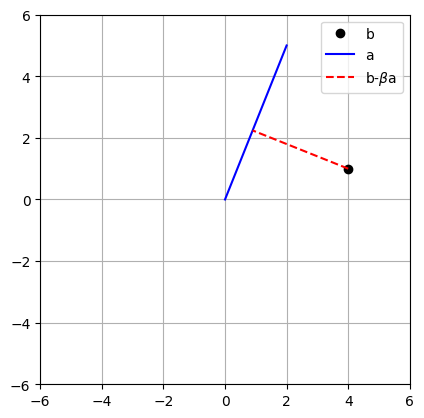

In [ ]:

# point b
b = np.array([4,1])

# line a
a = np.array([ 2, 5 ])

# beta
beta = (a.T@b) / (a.T@a)

# draw!
plt.plot(b[0],b[1],'ko',label='b')
plt.plot([0, a[0]],[0, a[1]],'b',label='a')

# now plot projection line
plt.plot([b[0], beta*a[0]],[b[1], beta*a[1]],'r--',label=r'b-$\beta$a')
plt.axis('square')
plt.grid()
plt.legend()
plt.axis((-6, 6, -6, 6))

plt.show()

## projection in R^N

In [ ]:
m = 16
n = 10

b = np.arange(m)
print(b)

A = np.random.randn(m,n)

x1 = np.linalg.inv(A.T@A)@ (A.T@b)

x2 = np.linalg.solve(A.T@A, A.T@b)

print(np.round(x1.T,3))
print(np.round(x2.T,3))# 3 vanda badi banayo vane error aauna sakxa




[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 1.054 -0.463  3.849 -1.422  1.657 -4.042 -1.762  5.846  3.667 -2.787]
[ 1.054 -0.463  3.849 -1.422  1.657 -4.042 -1.762  5.846  3.667 -2.787]


In [ ]:
from re import X
# Projection in R^2
m = 3
n = 2

b = np.random.randn(m,1)

A = np.random.randn(m,n)

#x1 = np.linalg.inv(A.T@A)@ (A.T@b)

x = np.linalg.solve(A.T@A, A.T@b)

Ax = A@x
print(b.T)
print(Ax.T)

# conclusion: (b is not equal to Ax) b is not in the span of lin combn of A


[[ 0.29487414 -0.51874025 -0.27368259]]
[[-0.13018936 -0.09902823 -0.20719846]]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
/usr/local/lib/python3.10/dist-packages/numpy/lib/stride_tricks.py:341: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = np.array(array, copy=False, subok=subok)
/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprec

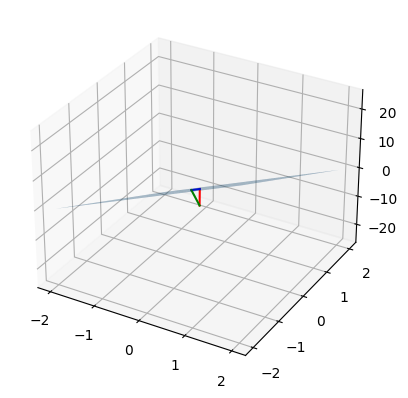

In [ ]:
ax = plt.axes(projection='3d')
# plot the vectors
ax.plot([0, b[0]],[0, b[1]],[0, b[2]],'r')
ax.plot([0, Ax[0]],[0, Ax[1]],[0, Ax[2]],'b')

# plot the projection line
ax.plot( [Ax[0][0], b[0]],
         [Ax[1][0], b[1]],
         [Ax[2][0], b[2]], 'g')

# now draw plane
xx, yy = np.meshgrid(np.linspace(-2,2),np.linspace(-2,2))
cp = np.cross(A[:,0],A[:,1])
z1 = (-cp[0]*xx - cp[1]*yy)*1./cp[2]
ax.plot_surface(xx,yy,z1,alpha=.4)

plt.show()

### code challenge: decompose vector to orthogonal components

In [ ]:
# vector to decompose
w = np.array([2,3])

# refrence vector
v = np.array([4,0])

#parallel vector
beta = np.dot(v,w) / np.dot(v,v)
wp = beta * v

# perpendicular vector
wpp = w - wp

#conform results aliebrically
print((wp + wpp) - w)
print(np.dot(wp,wpp)) #because dot product of orthogonal vector should be zero

[0. 0.]
0.0


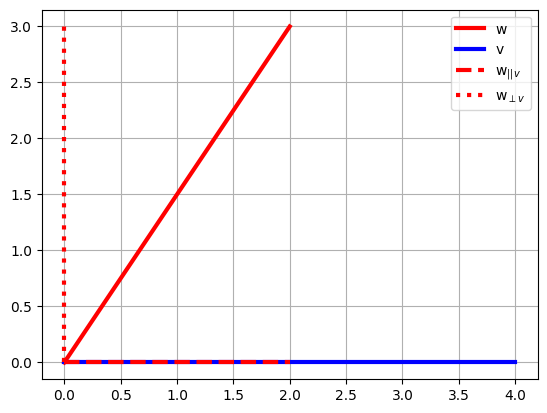

In [ ]:
plt.plot([0,w[0]],[0,w[1]],'r',linewidth=3)
plt.plot([0,v[0]],[0,v[1]],'b',linewidth=3)
plt.plot([0,wp[0]],[0,wp[1]],'r--',linewidth=3)
plt.plot([0,wpp[0]],[0,wpp[1]],'r:',linewidth=3)

plt.legend(['w','v','w$_{||v}$','w$_{\perp v}$'])
plt.grid()
plt.show()


## QR decomposition

In [ ]:
A = [[1,0],
     [1,0],
     [0,1]]

# Full QR decomposition
Q,R = np.linalg.qr(A,'complete')
print(Q)

# Economy QR decomposition
Q,R = np.linalg.qr(A)
print(Q)


[[-0.70710678  0.          0.70710678]
 [-0.70710678  0.         -0.70710678]
 [-0.         -1.          0.        ]]
[[-0.70710678  0.        ]
 [-0.70710678  0.        ]
 [-0.         -1.        ]]


In [ ]:
M = np.array([[1,1,-2],[3,-1,1]])

# QR decomposition
Q,R = np.linalg.qr(M,'complete')

# notice 
print('R from QR:',np.round(R,4))
print('R from Q^TM:', np.round(Q.T@M, 4))#both are equal
 

R from QR: [[-3.1623  0.6325 -0.3162]
 [ 0.     -1.2649  2.2136]]
R from Q^TM: [[-3.1623  0.6325 -0.3162]
 [ 0.     -1.2649  2.2136]]


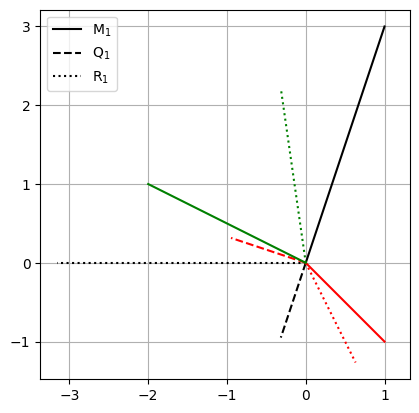

In [ ]:
# plot
colorz = 'krg'

for i in range(0,np.shape(M)[1]):

  #plot original vector M
  plt.plot([0,M[0,i]],[0,M[1,i]],colorz[i])

  # plot orthogonalized vector Q
  if i < np.shape(Q)[1]:
    plt.plot([0,Q[0,i]],[0,Q[1,i]],colorz[i],linestyle='--')

  # plot residual vector R
  plt.plot([0,R[0,i]],[0,R[1,i]], colorz[i], linestyle=':')

plt.legend(['M$_1$','Q$_1$','R$_1$'])
plt.axis('square')
plt.grid(True)
plt.show()

### code challenge: Gram-Schmidt algorithm

In [ ]:
# square matrix
m =4
n = 4
A = np.random.randn(m,n)
Q = np.zeros((m,n))

# Loop over columns
for  i in range(n):
  Q[:,i] = A[:,i]
  a = A[:,i]

  #step 1: orthogonalize the ith column in Q.
  #        relative to previous columns in A
  for j in range(i):
    q = Q[:,j]
    Q[:,i] = Q[:,i] - np.dot(a,q)/np.dot(q,q) * q
  
  # step 2: normalize ith column of Q
  Q[:,i] = Q[:,i] / np.linalg.norm(Q[:,i])



[[ 1. -0.  0. -0.]
 [-0.  1.  0. -0.]
 [ 0.  0.  1.  0.]
 [-0. -0.  0.  1.]]


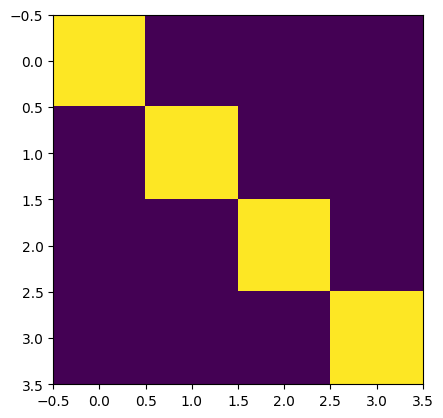

In [ ]:
#check Q.T@Q = I
print(np.round(Q.T@Q,3))
plt.imshow(Q.T@Q)
plt.show()



In [ ]:
#check against np.linalg.qr()
Q2 ,R = np.linalg.qr(A,'complete')
print(np.round(Q,3))
print(np.round(Q2,3))

[[ 0.623  0.666  0.233  0.339]
 [-0.326 -0.062 -0.267  0.905]
 [-0.686  0.477  0.547 -0.053]
 [-0.189  0.571 -0.758 -0.253]]
[[-0.623 -0.666 -0.233 -0.339]
 [ 0.326  0.062  0.267 -0.905]
 [ 0.686 -0.477 -0.547  0.053]
 [ 0.189 -0.571  0.758  0.253]]


### code challenge: Inverse via QR

[[-0.05777778 -0.54222222  0.00444444  0.19555556]
 [-0.06074074 -0.07259259  0.09185185 -0.09185185]
 [-0.03851852 -0.09481481 -0.0637037   0.0637037 ]
 [ 0.04740741 -0.11407407  0.00148148 -0.00148148]]
[[-0.05777778 -0.54222222  0.00444444  0.19555556]
 [-0.06074074 -0.07259259  0.09185185 -0.09185185]
 [-0.03851852 -0.09481481 -0.0637037   0.0637037 ]
 [ 0.04740741 -0.11407407  0.00148148 -0.00148148]]
[[-0.05777778 -0.54222222  0.00444444  0.19555556]
 [-0.06074074 -0.07259259  0.09185185 -0.09185185]
 [-0.03851852 -0.09481481 -0.0637037   0.0637037 ]
 [ 0.04740741 -0.11407407  0.00148148 -0.00148148]]
[[ 3.46944695e-17  0.00000000e+00  2.42861287e-17  2.77555756e-17]
 [-1.38777878e-17  1.38777878e-17  1.38777878e-17  0.00000000e+00]
 [ 0.00000000e+00  1.38777878e-17  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]


<ipython-input-22-92998732ed49>:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


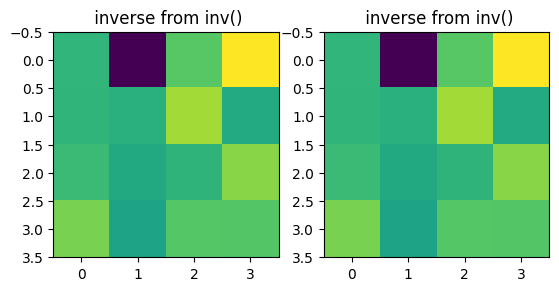

In [ ]:
A = np.round(10*np.random.randn(4,4))

Q,R = np.linalg.qr(A)

plt.imshow(R)# R is upper traingular

Ainv = np.linalg.inv(R) @ Q.T # inverse via QR

Ainv2 = np.linalg.solve(R,Q.T)

Ainv3 = np.linalg.inv(A) # explicit inverse

print(Ainv)
print(Ainv2)
print(Ainv3)
print(Ainv-Ainv2)

plt.subplot(121)
plt.imshow(Ainv)
plt.title(' inverse from inv()')
plt.subplot(122)
plt.imshow(Ainv2)
plt.title(' inverse from inv()')
plt.show()

In [ ]:
np.corrcoef((Ainv.flatten(),Ainv2.flatten(),Ainv3.flatten())) # correlation between three variables
#conclusion: all the method gives equivalent result(Thus, 1)

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

### code challenge: Sherman- Morrison Inverse

In [ ]:
m = 5
a = np.random.randn(m)
b = np.random.randn(m)

A = np.eye(m) - np.outer(a,b)
Ai = np.eye(m) + np.outer(a,b)/(1-np.dot(a,b))
print(np.round(A@Ai,3))

[[ 1.  0.  0.  0.  0.]
 [-0.  1.  0.  0.  0.]
 [-0.  0.  1.  0. -0.]
 [-0.  0.  0.  1.  0.]
 [-0.  0. -0.  0.  1.]]


In [ ]:
a = a/np.linalg.norm(a)
b = a

A = np.eye(m) - np.outer(a,b)
Ai = np.eye(m) + np.outer(a,b)/(1-np.dot(a,b))
print(np.round(A@Ai,2))

[[ 1.    0.    0.03 -0.02 -0.03]
 [-0.    1.   -0.01 -0.01 -0.01]
 [ 0.   -0.    0.94 -0.01  0.02]
 [-0.   -0.    0.04  0.99  0.  ]
 [-0.01 -0.    0.01 -0.    0.94]]


### code challenge: A.T A = R.T R

In [ ]:
A = np.random.randn(10,4) # any matrix

AtA = A.T @ A

Q,R = np.linalg.qr(A)
RtR = R.T@R

print(AtA-RtR)

[[-1.77635684e-15  0.00000000e+00 -4.44089210e-16  3.33066907e-16]
 [ 0.00000000e+00  3.55271368e-15  2.66453526e-15 -2.22044605e-15]
 [-4.44089210e-16  2.66453526e-15  8.88178420e-16 -2.22044605e-15]
 [ 3.33066907e-16 -2.22044605e-15 -2.22044605e-15  1.77635684e-15]]


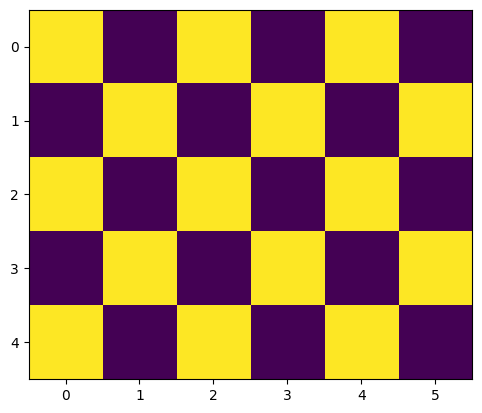

In [ ]:
A = np.array([[1,0,1,0,1,0],
                [0,1,0,1,0,1],
                [1,0,1,0,1,0],
                [0,1,0,1,0,1],
                [1,0,1,0,1,0]])
plt.imshow(A)